In [1]:
import numpy as np
import pandas as pd

In [2]:
train = np.load('Downloads/X.npy')

In [3]:
train

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [4]:
test = np.load('Downloads/Y.npy')

In [5]:
test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [6]:
train.shape

(2062, 64, 64)

In [7]:
test.shape

(2062, 10)

In [8]:
X= train.reshape(-1,64,64,1)
X.shape

(2062, 64, 64, 1)

In [9]:
import matplotlib.pyplot as plt

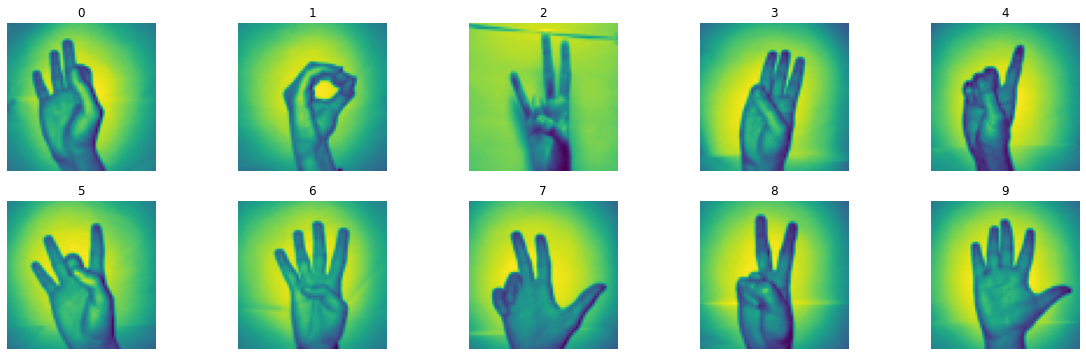

In [10]:
plt.figure(figsize=(20,6))

for i,j in enumerate([0,205,411,617,823,1030,1237,1444,1650,1858]):
    plt.subplot(2,5,i+1)
    plt.imshow(X[j].reshape(64,64))
    plt.title(np.argmax(test[j]))
    plt.axis("off")

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,test,test_size=0.2)

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [23]:
from tensorflow.python.ops.gen_nn_ops import softmax
model = Sequential()
model.add(Conv2D(5,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(64,64,1)))
model.add(Conv2D(6,kernel_size=(3,3),activation=tf.nn.sigmoid))
model.add(Conv2D(8,kernel_size=(7,7),activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(10,activation=tf.nn.softmax))

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 5)         50        
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 6)         276       
                                                                 
 conv2d_5 (Conv2D)           (None, 54, 54, 8)         2360      
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 8)         0         
                                                                 
 flatten_1 (Flatten)         (None, 23328)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                233290    
                                                                 
Total params: 235,976
Trainable params: 235,976
Non-tr

In [26]:
model.fit(x=X_train,y=Y_train,epochs=10)

Epoch 1/10
52/52 [==============================] - 11s 187ms/step - loss: 0.3507 - accuracy: 0.0891
Epoch 2/10
52/52 [==============================] - 10s 189ms/step - loss: 0.3251 - accuracy: 0.1013
Epoch 3/10
52/52 [==============================] - 10s 188ms/step - loss: 0.3251 - accuracy: 0.0916
Epoch 4/10
52/52 [==============================] - 10s 187ms/step - loss: 0.3251 - accuracy: 0.1067
Epoch 5/10
52/52 [==============================] - 10s 187ms/step - loss: 0.3251 - accuracy: 0.1067
Epoch 6/10
52/52 [==============================] - 10s 187ms/step - loss: 0.3251 - accuracy: 0.1067
Epoch 7/10
52/52 [==============================] - 10s 187ms/step - loss: 0.3251 - accuracy: 0.1067
Epoch 8/10
52/52 [==============================] - 10s 187ms/step - loss: 0.3251 - accuracy: 0.1067
Epoch 9/10
52/52 [==============================] - 10s 188ms/step - loss: 0.3251 - accuracy: 0.1067
Epoch 10/10
52/52 [==============================] - 10s 190ms/step - loss: 0.3250 - accura

In [27]:
evals = model.evaluate(X_test,Y_test)
print("loss" +str(evals[0]))
print("accuracy" +str(evals[1]))

13/13 [==============================] - 1s 37ms/step - loss: 0.3254 - accuracy: 0.0751
loss0.32537582516670227
accuracy0.07506053149700165
